# IMPORTING LIBRARIES

In [1]:
#let us start by importing the relevant libraries

%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Loading Data Set

In [2]:
vehdf= pd.read_csv("vehicle-1.csv")

In [3]:
vehdf.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder() 
columns = vehdf.columns
#Let's Label Encode our class variable: 
print(columns)
vehdf['class'] = le.fit_transform(vehdf['class'])
vehdf.shape

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


(846, 19)

# Performing EDA:
Finding Any Missing Value

Finding Outliers

Understanding attributes using descriptive statistics

visualizing attribute distribution using univariate and multivariate analysis

Finding attribute correlation and analysing which attribute is more important

In [5]:
vehdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
from sklearn.impute import SimpleImputer

newdf = vehdf.copy()

X = newdf.iloc[:,0:19] #separting all numercial independent attribute
#y = vehdf.iloc[:,18] #seprarting class attribute. 
#imputer = SimpleImputer()
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe()

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    0.977541  
std            6.152247       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

In [8]:
print("Original null value count:", vehdf.isnull().sum())

Original null value count: compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [9]:
print("\n\nCount after we impiuted the NaN value: ", newdf.isnull().sum())



Count after we impiuted the NaN value:  compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


# Obseravtion:¶
If you carefully observe above, our orginal dataframe vehdf and new dataframe df , we will find that , After we imputed the datfarme series , using simpleimputer, we can see that the missing NaN values from our orginal vehdf datframe columns are treated and replaced using mode strategy.

In [10]:
newdf.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [11]:
newdf.shape

(846, 19)

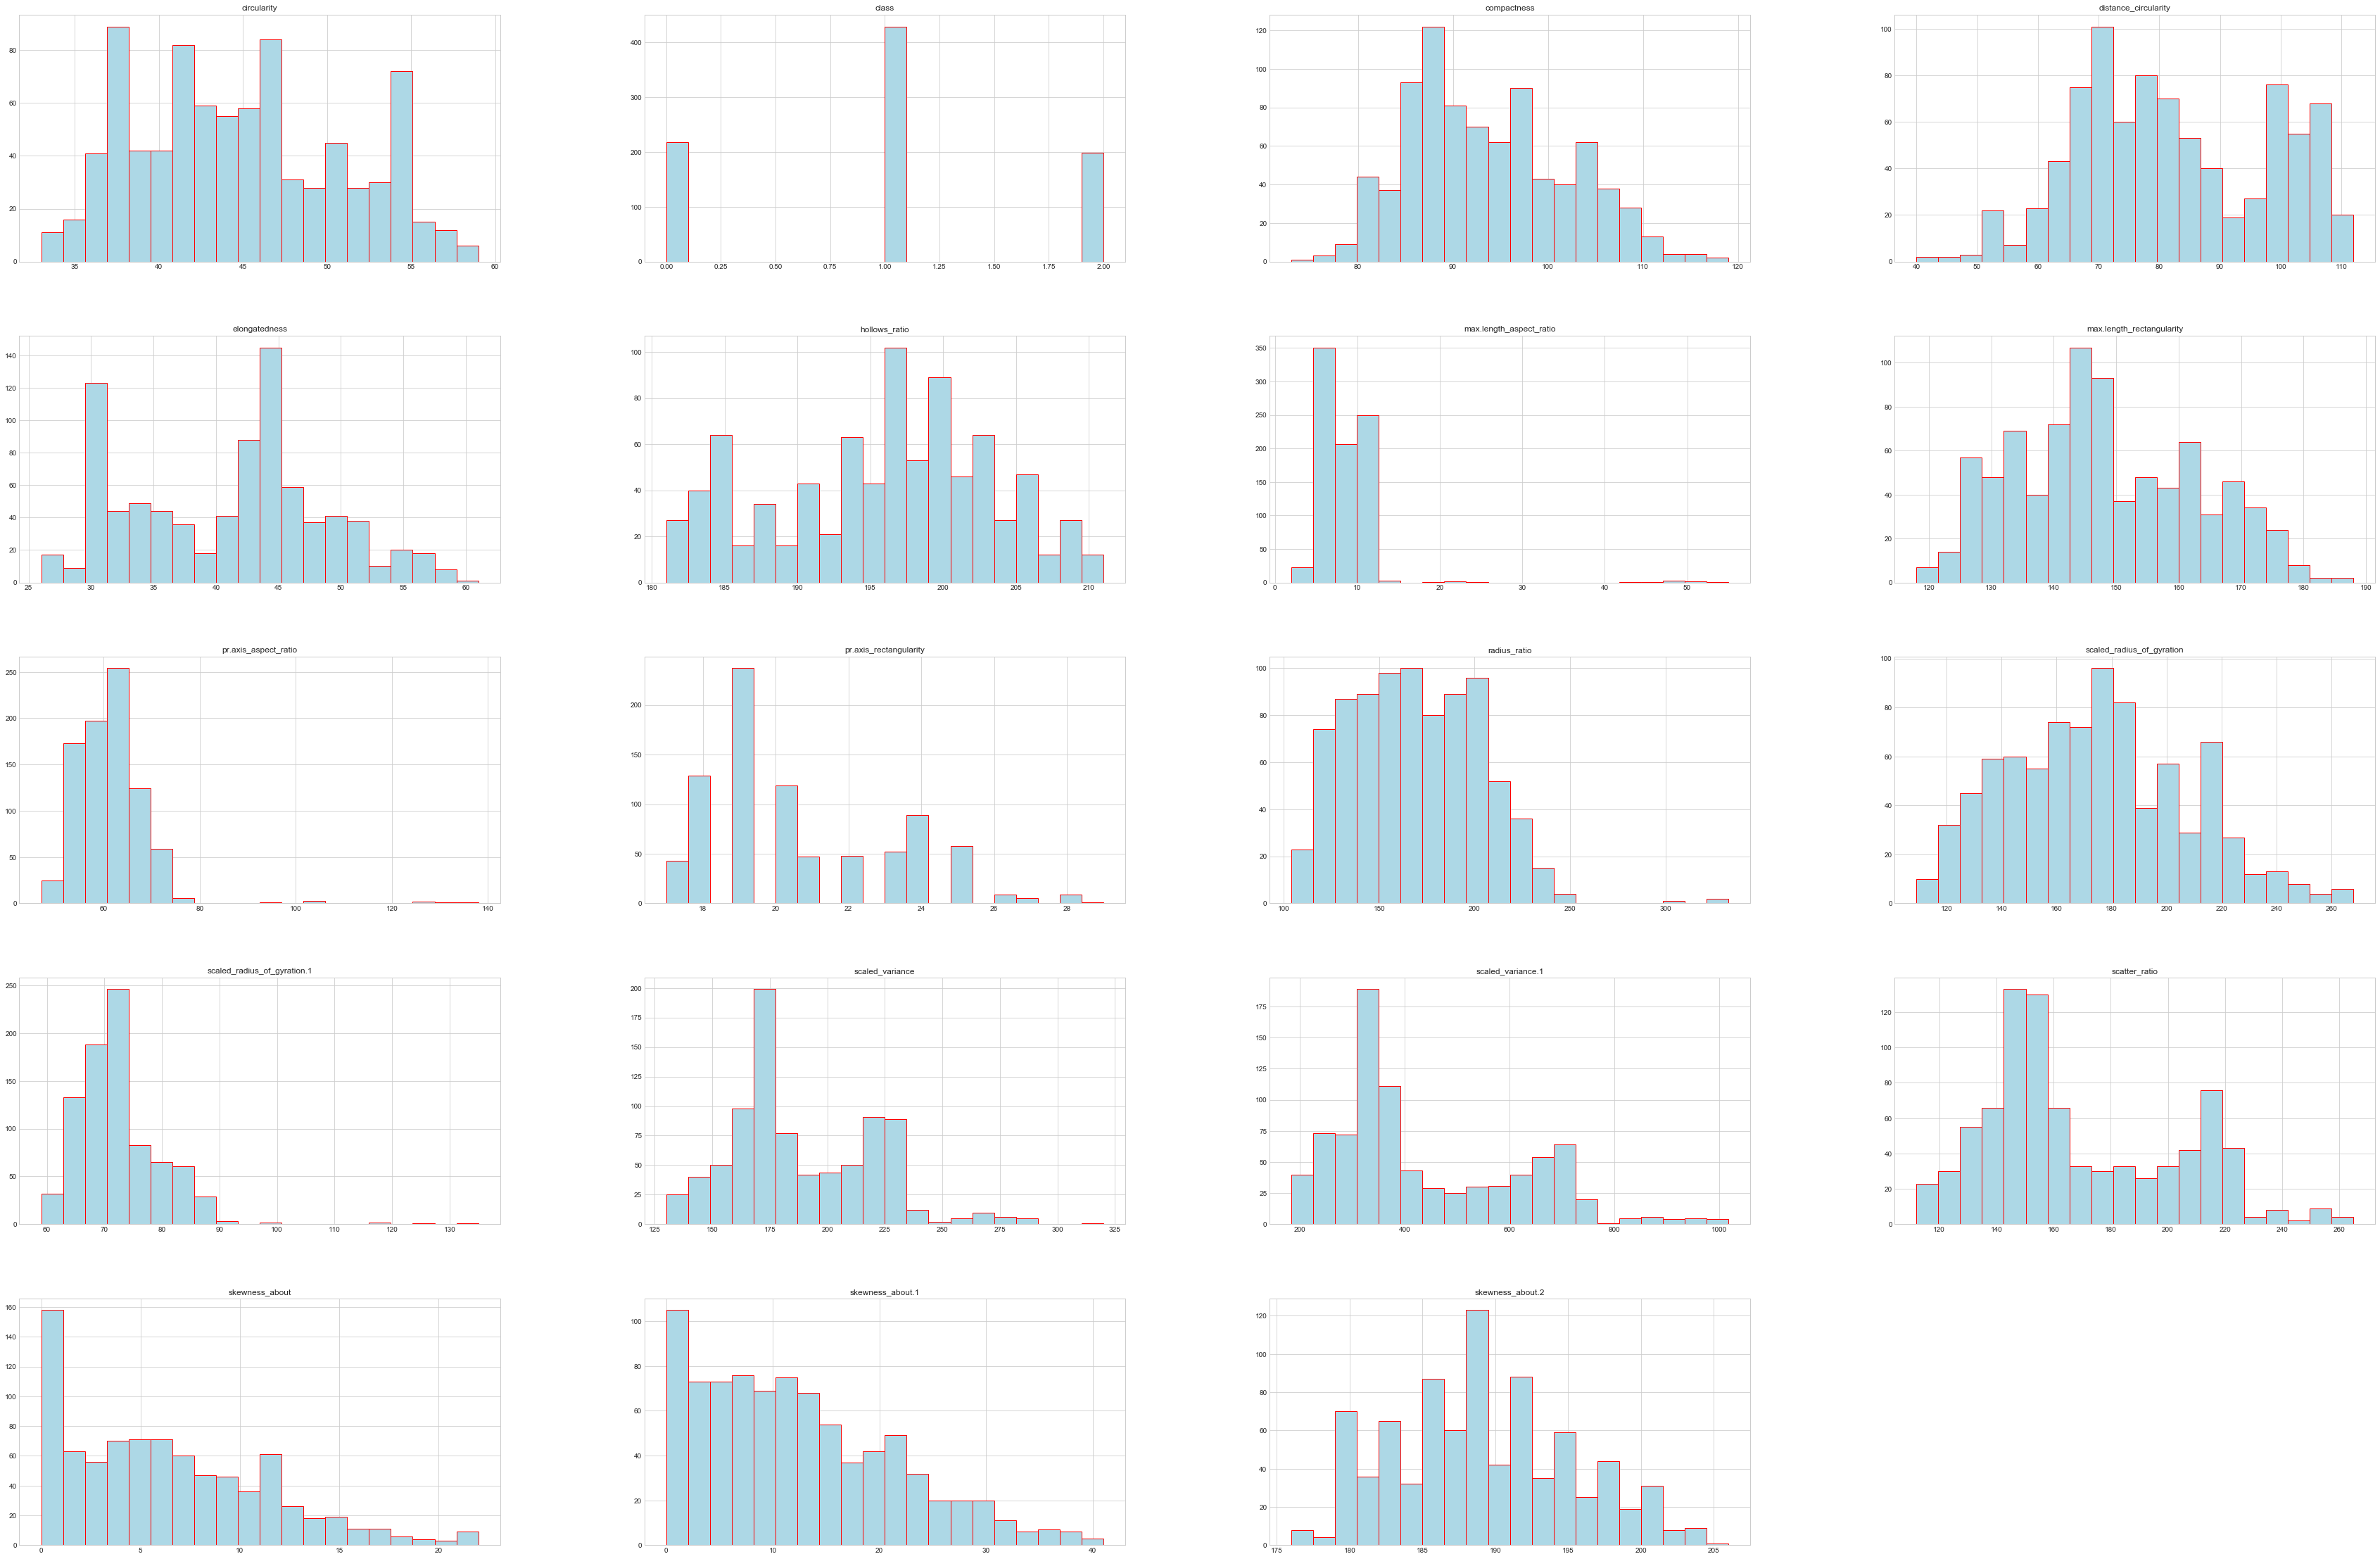

In [12]:
plt.style.use('seaborn-whitegrid')

newdf.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

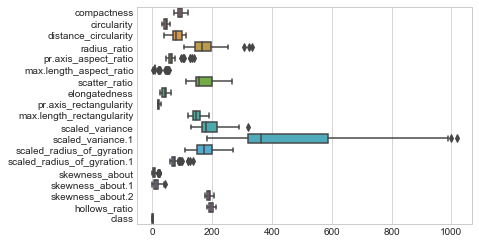

In [14]:
#Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers

ax = sns.boxplot(data=newdf, orient="h")

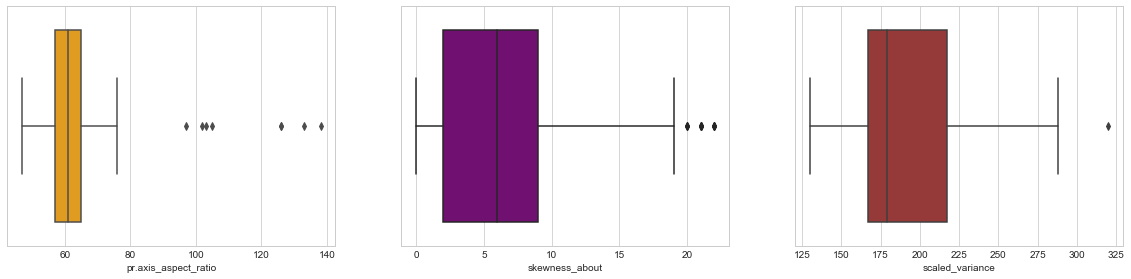

In [15]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['pr.axis_aspect_ratio'], color='orange')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.skewness_about, color='purple')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.scaled_variance, color='brown')

plt.show()

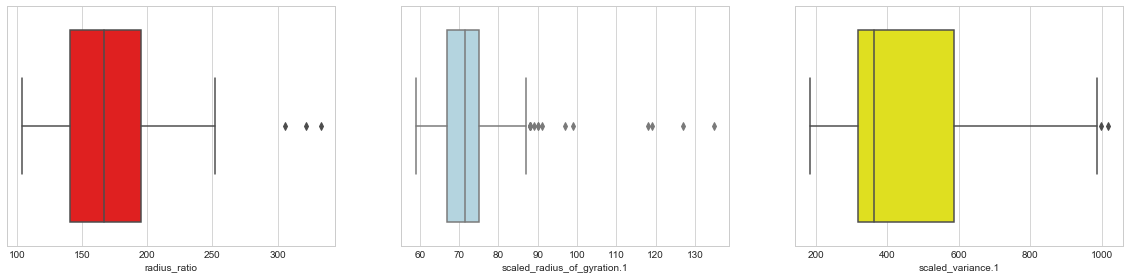

In [16]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['radius_ratio'], color='red')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= newdf['scaled_variance.1'], color='yellow')

plt.show()

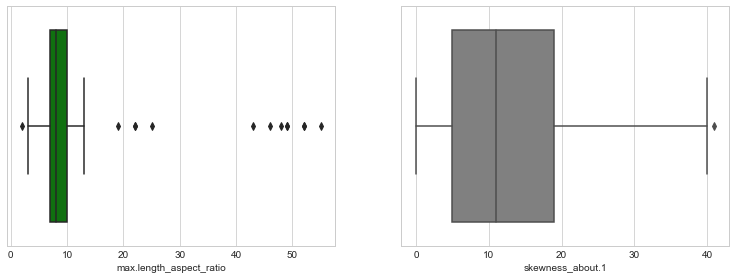

In [17]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['max.length_aspect_ratio'], color='green')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['skewness_about.1'], color='grey')


plt.show()

In [18]:
newdf.shape

(846, 19)

In [19]:
from scipy.stats import iqr

Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [21]:
cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

(813, 19)

# Let's Plot The Box Plot Once Agaian To See if outliers are removed.

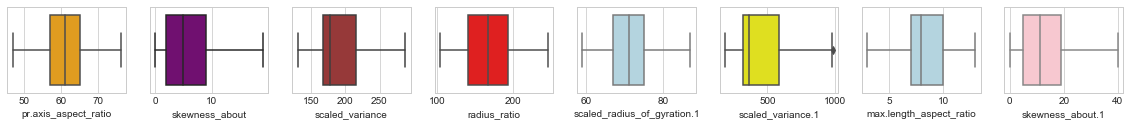

In [22]:
plt.figure(figsize= (20,15))
plt.subplot(8,8,1)
sns.boxplot(x= cleandf['pr.axis_aspect_ratio'], color='orange')

plt.subplot(8,8,2)
sns.boxplot(x= cleandf.skewness_about, color='purple')

plt.subplot(8,8,3)
sns.boxplot(x= cleandf.scaled_variance, color='brown')
plt.subplot(8,8,4)
sns.boxplot(x= cleandf['radius_ratio'], color='red')

plt.subplot(8,8,5)
sns.boxplot(x= cleandf['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(8,8,6)
sns.boxplot(x= cleandf['scaled_variance.1'], color='yellow')

plt.subplot(8,8,7)
sns.boxplot(x= cleandf['max.length_aspect_ratio'], color='lightblue')

plt.subplot(8,8,8)
sns.boxplot(x= cleandf['skewness_about.1'], color='pink')

plt.show()

# # We can see that all out boxplot for all the attributes which had outlier have been treated and removed

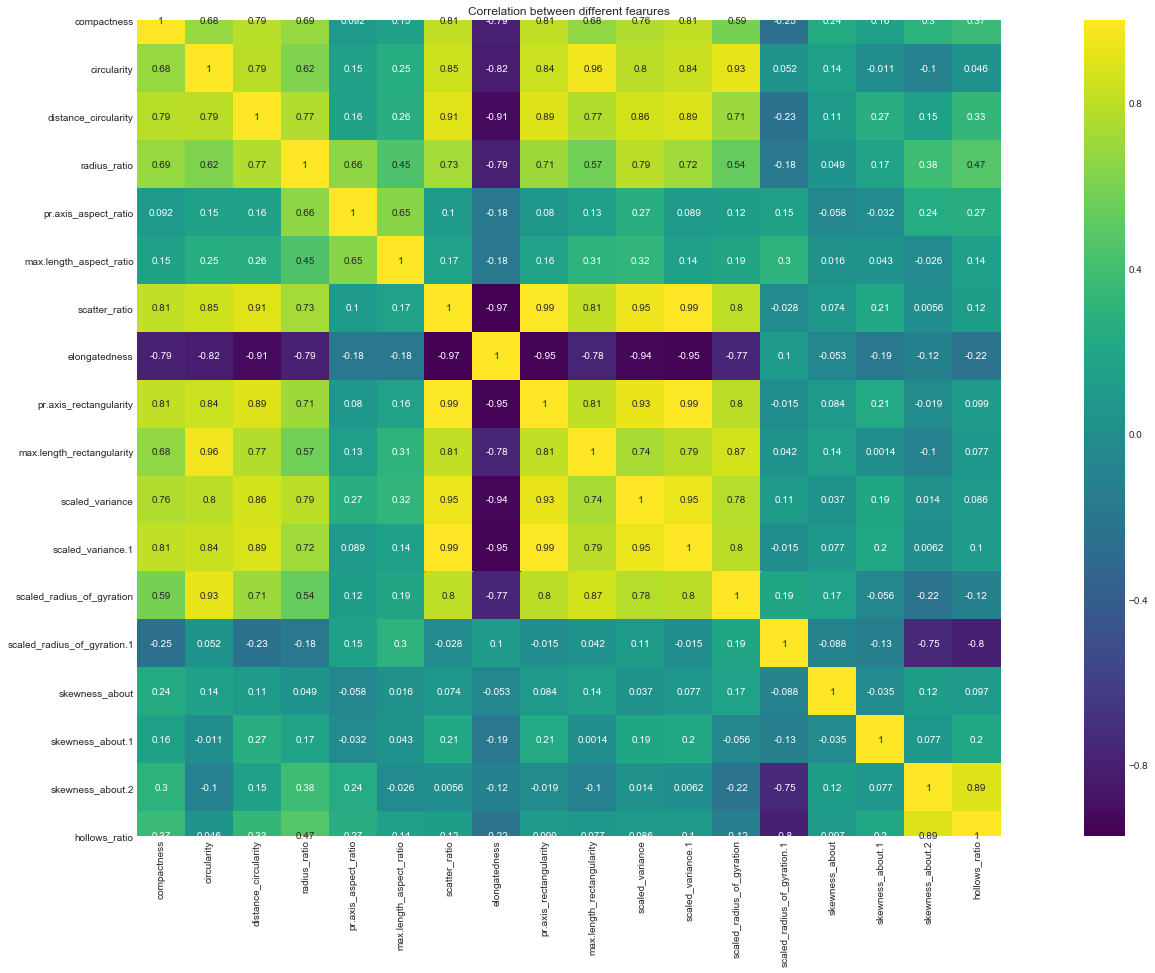

In [23]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();
    
# Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA as PCA should only be perfromed on independent attribute
cleandf= newdf.drop('class', axis=1)
#print("After Dropping: ", cleandf)
correlation_heatmap(cleandf, 30,15)

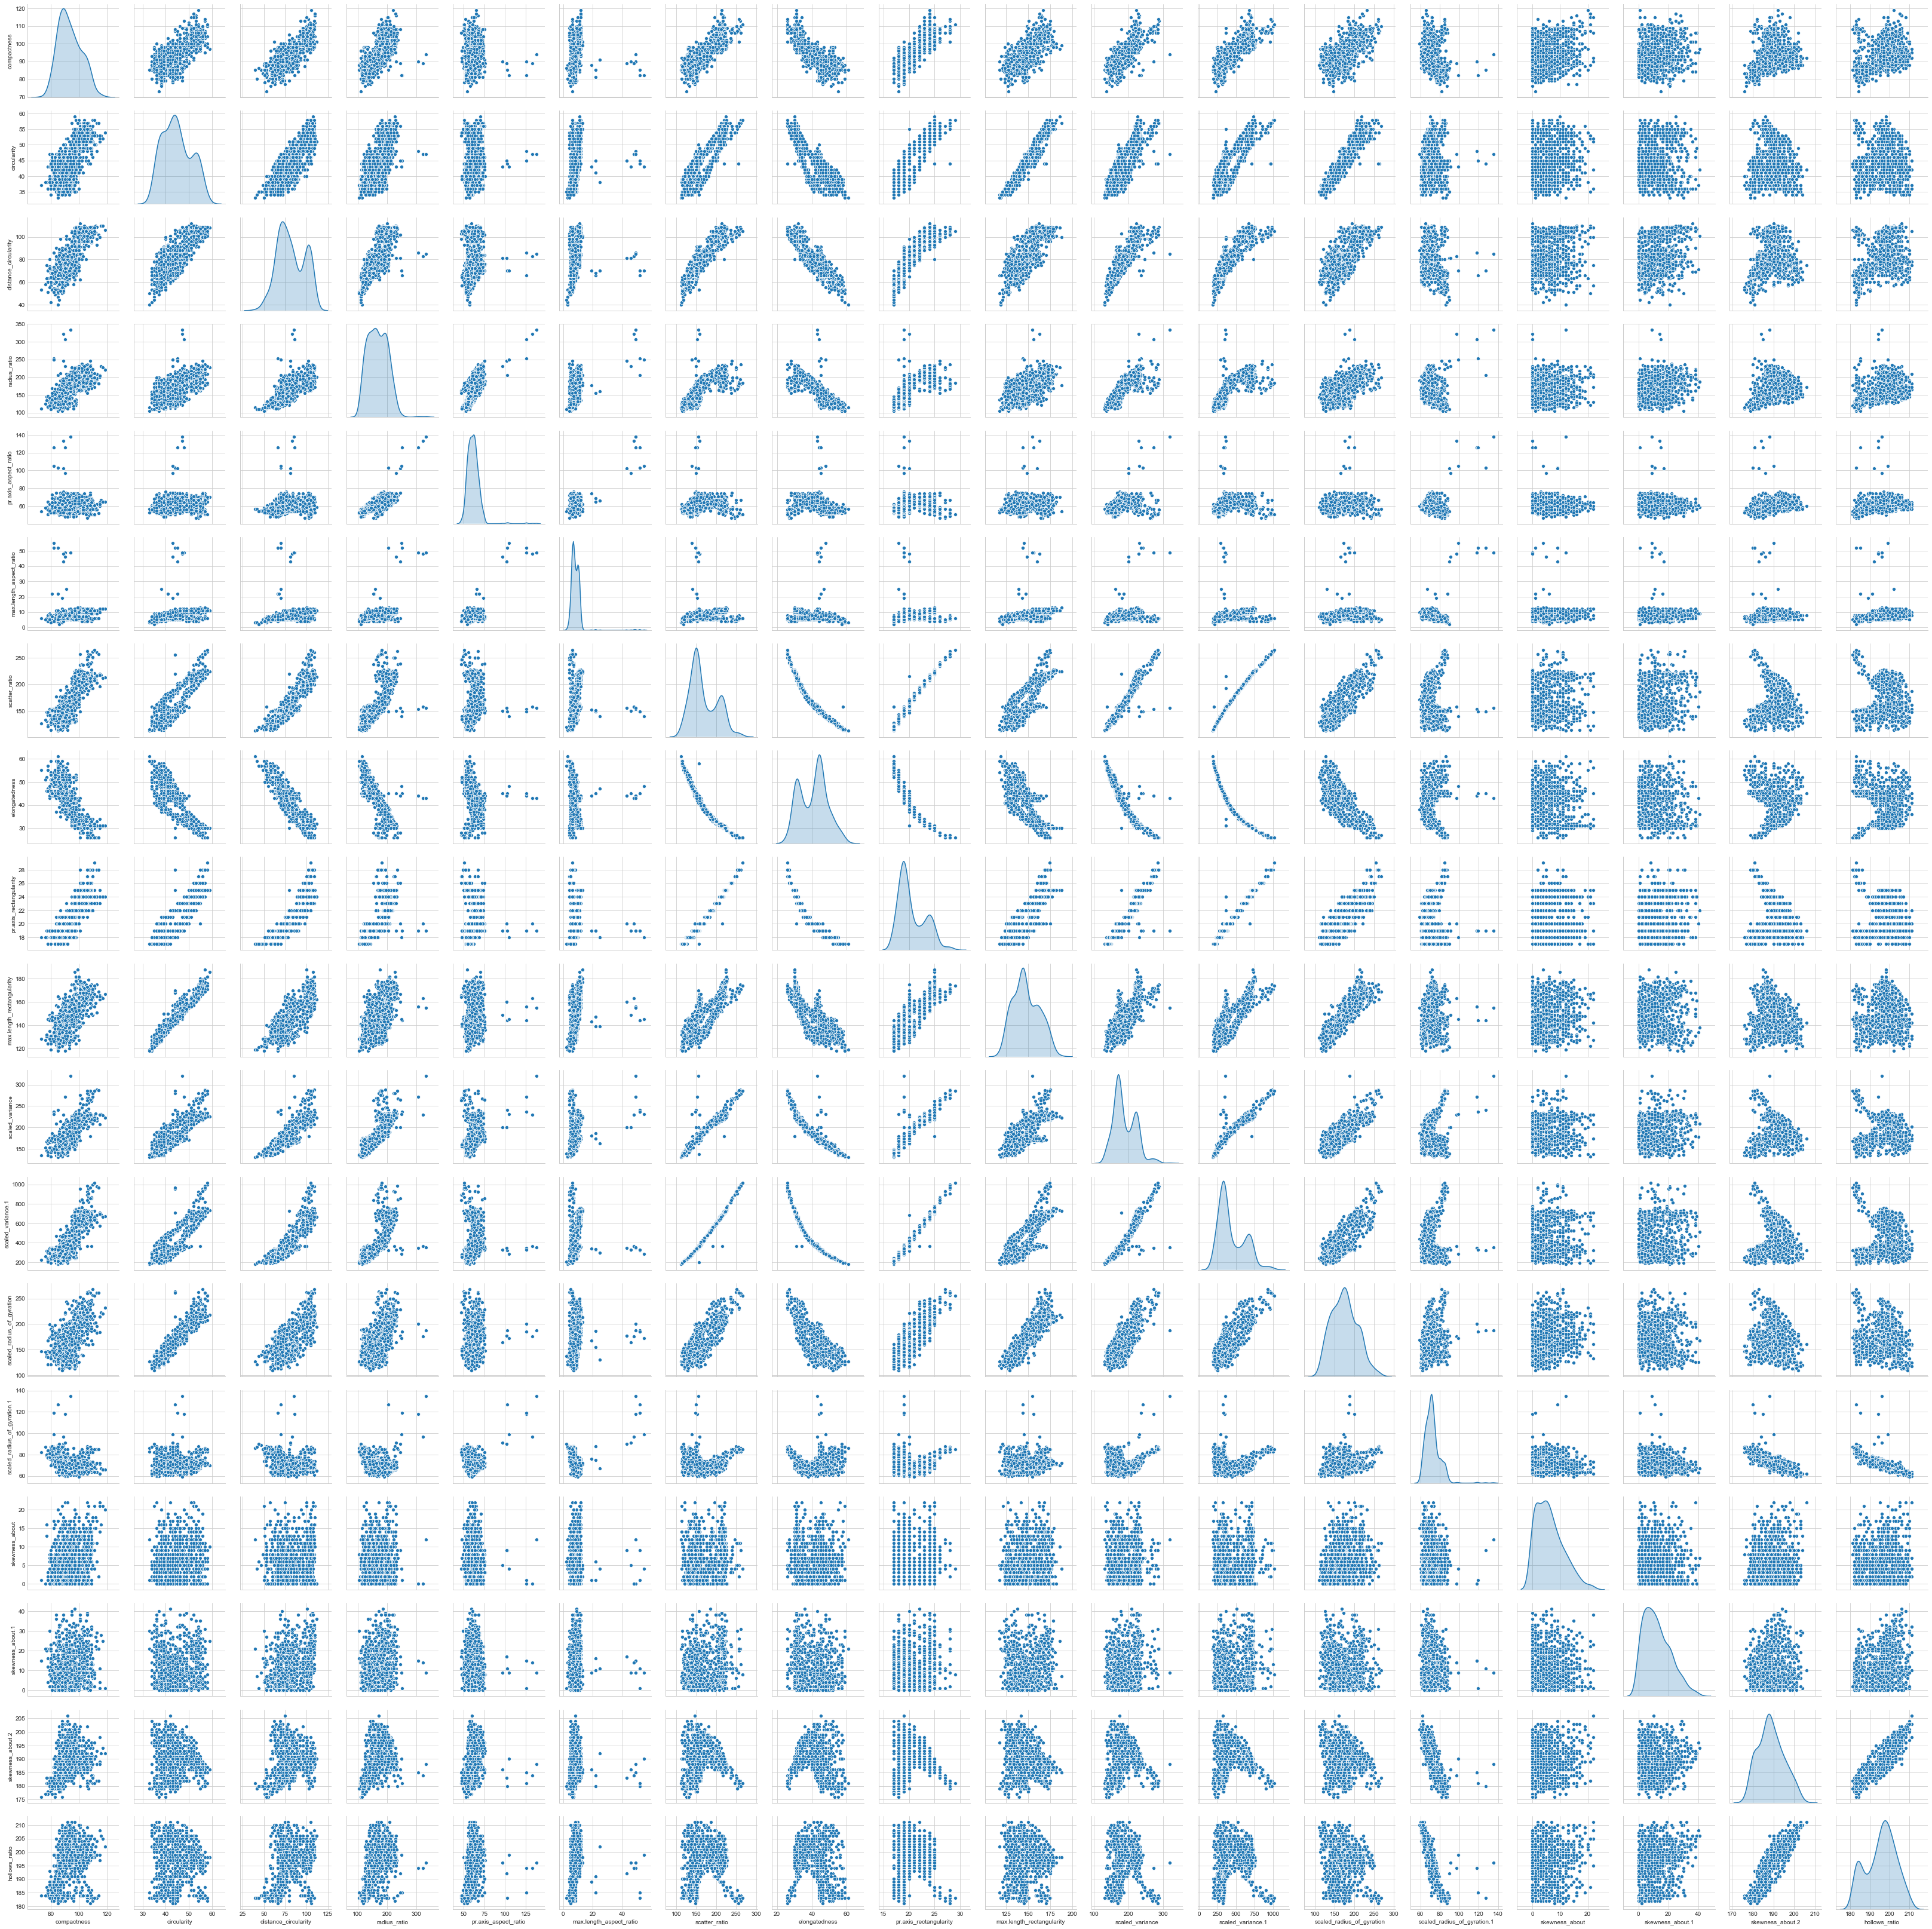

In [24]:
sns.pairplot(cleandf, diag_kind="kde")

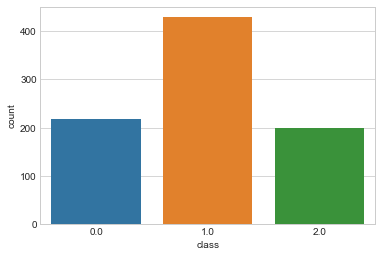

In [25]:
#display how many are car,bus,van. 
newdf['class'].value_counts()

splitscaledf = newdf.copy()
sns.countplot(newdf['class'])
plt.show()

# Principal Component Analysis(PCA):

# We will perform PCA in following steps:
    
-Split our data into train and test data set

-normalize the tarining set using standard scalar

-Calculate the covariance matrix.

-Calculate the eigenvectors and their eigenvalues.

-Sort the eigenvectors according to their eigenvalues in descending order.

-Choose the first K eigenvectors (where k is the dimension we'd like to end up with).
                                 
-Build new dataset with reduced dimensionality.

# Approach 1:

In [26]:
#now separate the dataframe into dependent and independent variables
#X1= newdf.drop('class',axis=1)
#y1 = newdf['class']
#print("shape of new_vehicle_df_independent_attr::",X.shape)
#print("shape of new_vehicle_df_dependent_attr::",y.shape)

X = newdf.iloc[:,0:18].values
y = newdf.iloc[:,18].values

X

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

In [27]:
from sklearn.preprocessing import StandardScaler
#We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)       

# Calculating covariance matrix

In [28]:
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  

# Calculating Eigen Vectors & Eigen Values

In [29]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

# Sort eigenvalues in descending order

In [30]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404602609088705, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.0149220585246344, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389645, array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
       -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
       -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
        0.07528289, -0.00873592, -0.03952427])), (1.1799374684450163, array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
       -0.03141473,  0.09574857, -0.0822902 ,  0.

In [32]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

# Plotting The Explained Variance and Princiapl Components:

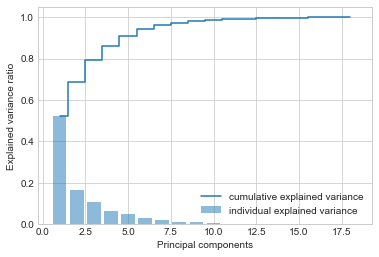

In [33]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

- From above we plot we can clealry observer that 8 dimension() are able to explain 95 %variance of data. 

- so we will use first 8 principal components going forward and calulate the reduced dimensions.

# Dimensionality Reduction
Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data!

In [34]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

0         1          2         3         4         5         6  \
0    0.334162  0.219026  -1.001584 -0.176612 -0.079301 -0.757447 -0.901124   
1   -1.591711  0.420603   0.369034 -0.233234 -0.693949 -0.517162  0.378637   
2    3.769324 -0.195283  -0.087859 -1.202212 -0.731732  0.705041 -0.034584   
3   -1.738598  2.829692  -0.109456 -0.376685  0.362897 -0.484431  0.470753   
4    0.558103 -4.758422 -11.703647 -0.147464 -3.256953 -0.203446  2.671578   
..        ...       ...        ...       ...       ...       ...       ...   
841 -0.442648  0.605884  -0.197213  1.444958 -1.065425  0.820179 -0.041563   
842 -0.314956 -0.164511  -0.794573  0.908272  0.235492 -1.438257 -0.599113   
843  4.809174  0.001249  -0.532333 -0.295652  1.344236 -0.217070  0.573249   
844 -3.294092  1.008276   0.357003  1.933675 -0.042768 -0.402491 -0.202406   
845 -4.765053 -0.334900   0.568136  1.224807  0.054051 -0.335637  0.058098   

            7  
0    0.381106  
1   -0.247059  
2   -0.482772  
3    0.023086  
4    0.448854  
..        ...  
841 -0.506991  
842  0.153086  
843 -0.110478  
844 -0.320622  
845  0.248035  

[846 rows x 8 columns]

# Pairplot Of Reduced Dimension After PCA

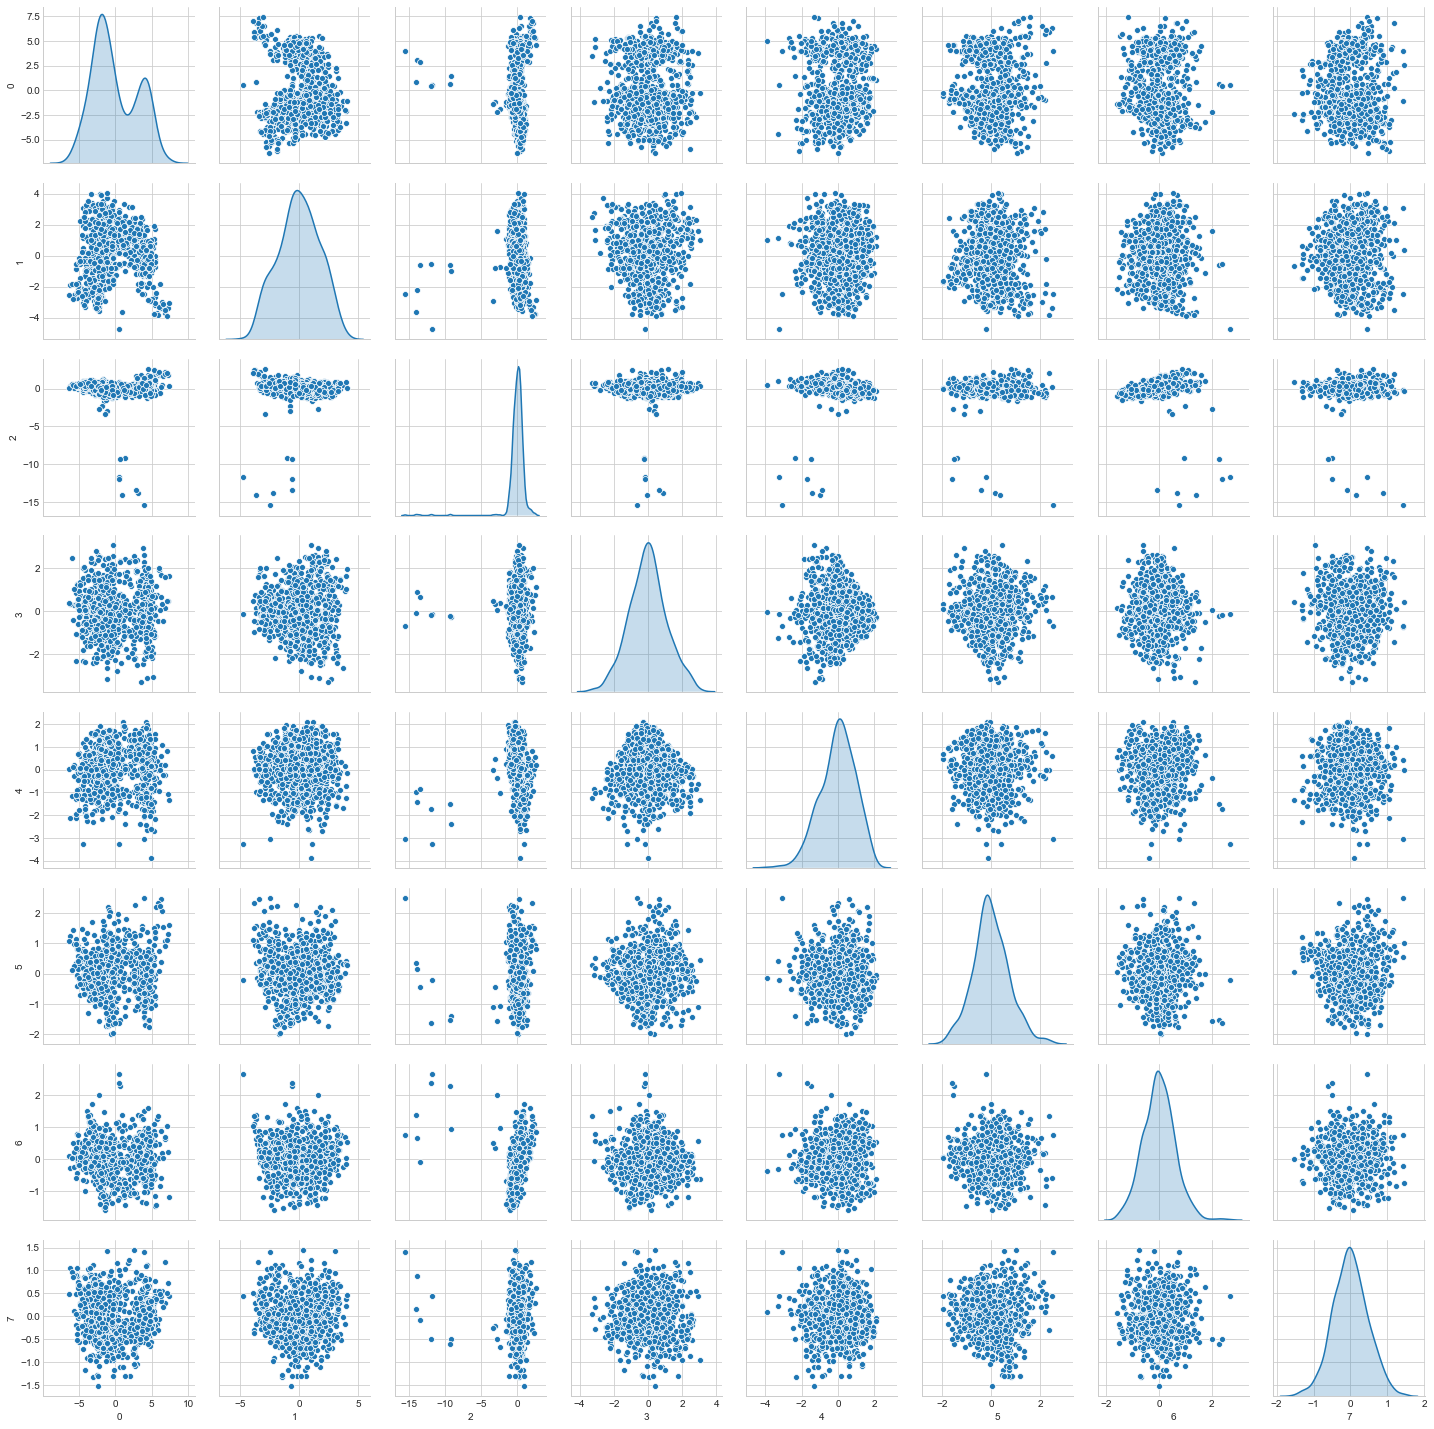

In [35]:
sns.pairplot(reduced_pca, diag_kind='kde') 
#sns.pairplot(reduced_pca1, diag_kind='kde') 

# Fitting Model and measuring score simply on Original Data

# Fit SVC Model ON Train-test Data:
Let's build two Support Vector Classifier Model one with 18 original independent variables and the second one with only the 8 new reduced variables constructed using PCA.

In [36]:
#now split the data into 70:30 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)
#pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca1,y,test_size=0.30,random_state=1)

In [37]:
svc = SVC() #instantiate the object

In [38]:
#fit the model on orighinal raw data
svc.fit(Orig_X_train,Orig_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)

In [40]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test)

In [41]:
#display accuracy score of both models

print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))

print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Original Data  0.952755905511811
Model Score On Reduced PCA Dimension  0.9330708661417323
Before PCA On Original 18 Dimension 0.952755905511811
After PCA(On 8 dimension) 0.9330708661417323


# Observation:

-On training data set we saw that our support vector classifier without performing PCA has an accuracy score of 95 %

-But when we applied the SVC model on PCA componenets(reduced dimensions) our model scored 93 %.

-Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model has fared well in terms of accuracy score.

Confusion Matrix For : 
 Original Data Set [[ 58   0   1]
 [  1 129   3]
 [  6   1  55]]


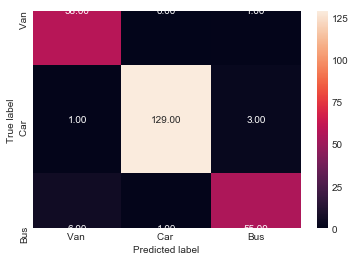

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 57   2   0]
 [  2 126   5]
 [  1   7  54]]


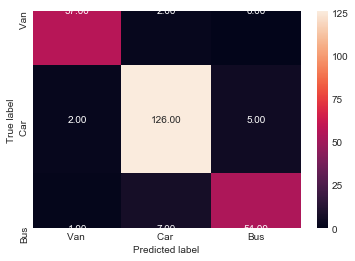

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.94        59
         1.0       0.99      0.97      0.98       133
         2.0       0.93      0.89      0.91        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        59
         1.0       0.93      0.95      0.94       133
         2.0       0.92      0.87      0.89        62

    accuracy                           0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254



In [42]:
# Calculate Confusion Matrix & PLot To Visualize it

def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1,2] )
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

draw_confmatrix(Orig_y_test, Orig_y_predict,"Van ", "Car ", "Bus", "Original Data Set" )

draw_confmatrix(pca_y_test, pca_y_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")

#Classification Report Of Model built on Raw Data
print("Classification Report For Raw Data:", "\n", classification_report(Orig_y_test,Orig_y_predict))

#Classification Report Of Model built on Principal Components:

print("Classification Report For PCA:","\n", classification_report(pca_y_test,pca_y_predict))

# Comments:
Confusion Metric Analysis ON Original Data:

Confusion Matrix For : Original Data Set [[ 58 0 1] [ 1 129 3] [ 6 1 55]]

# Confusion Metric Analysis ON Reduced Dimesnion After PCA :
    
For Reduced Dimensions Using PCA:
[[ 57 2 0] [ 2 126 5] [ 1 7 54]]

# On original data:
    
 - our model has 99 % precison  score when it comes to classify car from the given set of silhoutte parameters. It has 89 % precision when it comes to classifying the input as van, while it has 93 % precison when it come to predict data as bus. 

 - In term of recall score our model has recal score of 98 % for van classification, 97 % for car and 89 % for bus. 
 - OUr model has an weighted average of 95 % for all classification metrics. 

# On Reduced Dimensions After PCA:

 - Our model has highest precision score of 95 % when it comes to predict van type, which is better as compared to predcition done on original data set, which came out with the precision score of 89 % for van.
 
 - Recall score is almost neck to neck with what our model scored on original data set. It showed highest recall score of 97 % in classifying data as car. 

# Approach 2:

    

# Perfrom The PCA and See How Our Model Perform:

In [43]:
splitscaledf.head(850)

compactness  circularity  distance_circularity  radius_ratio  \
0           95.0         48.0                  83.0         178.0   
1           91.0         41.0                  84.0         141.0   
2          104.0         50.0                 106.0         209.0   
3           93.0         41.0                  82.0         159.0   
4           85.0         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841         93.0         39.0                  87.0         183.0   
842         89.0         46.0                  84.0         163.0   
843        106.0         54.0                 101.0         222.0   
844         86.0         36.0                  78.0         146.0   
845         85.0         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                     10.0          162.0   
1                    57.0                      9.0          149.0   
2                    66.0                     10.0          207.0   
3                    63.0                      9.0          144.0   
4                   103.0                     52.0          149.0   
..                    ...                      ...            ...   
841                  64.0                      8.0          169.0   
842                  66.0                     11.0          159.0   
843                  67.0                     12.0          222.0   
844                  58.0                      7.0          135.0   
845                  55.0                      5.0          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                      159.0   
1             45.0                    19.0                      143.0   
2             32.0                    23.0                      158.0   
3             46.0                    19.0                      143.0   
4             45.0                    19.0                      144.0   
..             ...                     ...                        ...   
841           40.0                    20.0                      134.0   
842           43.0                    20.0                      159.0   
843           30.0                    25.0                      173.0   
844           50.0                    18.0                      124.0   
845           56.0                    17.0                      128.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [44]:
splitscale_X = splitscaledf.iloc[:,0:18].values
splitscale_y = splitscaledf.iloc[:,18].values

print("Indpendent Variable X",splitscale_X )
print("Class Variable y",splitscale_y )

Indpendent Variable X [[ 95.  48.  83. ...  16. 187. 197.]
 [ 91.  41.  84. ...  14. 189. 199.]
 [104.  50. 106. ...   9. 188. 196.]
 ...
 [106.  54. 101. ...   4. 187. 201.]
 [ 86.  36.  78. ...  25. 190. 195.]
 [ 85.  36.  66. ...  18. 186. 190.]]
Class Variable y [2. 2. 1. 2. 0. 0. 0. 2. 2. 1. 2. 1. 0. 2. 0. 1. 2. 0. 1. 1. 0. 2. 0. 0.
 1. 2. 1. 1. 0. 1. 2. 1. 1. 1. 1. 2. 0. 2. 1. 0. 1. 2. 2. 1. 1. 2. 2. 0.
 2. 1. 1. 1. 1. 0. 0. 2. 1. 2. 1. 2. 1. 1. 2. 0. 0. 1. 0. 1. 2. 0. 1. 1.
 1. 1. 2. 1. 1. 1. 0. 0. 0. 0. 2. 1. 0. 0. 2. 2. 0. 1. 1. 1. 1. 2. 0. 1.
 1. 0. 1. 0. 0. 2. 2. 2. 0. 1. 1. 1. 0. 0. 2. 2. 1. 1. 2. 2. 1. 1. 0. 0.
 1. 2. 2. 1. 2. 2. 0. 0. 2. 0. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 0. 1. 0.
 1. 1. 2. 0. 1. 2. 1. 0. 1. 1. 2. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 2. 1. 0. 2. 0. 2. 0. 1. 0. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 2.
 1. 0. 1. 0. 1. 0. 0. 0. 2. 1. 1. 1. 2. 2. 1. 0. 0. 1. 1. 2. 0. 0. 1. 1.
 1. 1. 0. 2. 1. 2. 0. 0. 1. 2. 1. 2. 1. 1. 2. 1. 0. 1. 2. 2. 0. 0. 1. 0.
 1.

In [45]:
#splitting the data in train and test sets into 70:30 Ratio

SplitScale_X_train, SplitScale_X_test, SplitScale_y_train, SplitScale_y_test = train_test_split(splitscale_X,splitscale_y, test_size = 0.3, random_state = 10)

In [46]:
ssx_train_sd = StandardScaler().fit_transform(SplitScale_X_train)
ssx_test_sd = StandardScaler().fit_transform(SplitScale_X_test)

print(len(ssx_train_sd))
print(len(ssx_test_sd))

592
254


In [47]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix_1 = np.cov(ssx_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', (cov_matrix_1))

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix_1)
print('Eigenvectors \n%s' %(e_vecs))
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00169205  0.69510999  0.79093174  0.68430087  0.10533174  0.13879193
   0.81466568 -0.79249053  0.81562662  0.69493762  0.75883574  0.81360243
   0.6018784  -0.23802643  0.21659465  0.16129088  0.29107259  0.36229106]
 [ 0.69510999  1.00169205  0.80101871  0.63753441  0.17332159  0.23038915
   0.85124238 -0.82911962  0.84353731  0.96223666  0.79821698  0.8377724
   0.92490531  0.04164937  0.12317003  0.0144264  -0.08843129  0.06521593]
 [ 0.79093174  0.80101871  1.00169205  0.76084958  0.1703543   0.25346094
   0.90364003 -0.91115044  0.89344273  0.79364077  0.85618354  0.88392536
   0.72188889 -0.20587281  0.09535999  0.26881961  0.13214005  0.3236881 ]
 [ 0.68430087  0.63753441  0.76084958  1.00169205  0.68494799  0.47133546
   0.72992301 -0.78442329  0.7057782   0.60117669  0.79595443  0.7127739
   0.55325762 -0.13680084  0.02938361  0.17620666  0.36656842  0.46385678]
 [ 0.10533174  0.17332159  0.1703543   0.68494799  1.00169205  0.6847859
   0.10994971 -

# Sort eigenvalues in descending order

In [48]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404602609088705, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.0149220585246344, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389645, array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
       -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
       -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
        0.07528289, -0.00873592, -0.03952427])), (1.1799374684450163, array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
       -0.03141473,  0.09574857, -0.0822902 ,  0.

# Principal Componenet Vs Explained Variance Ratio

In [49]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

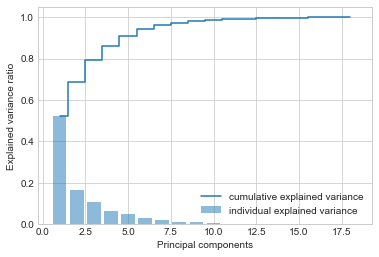

In [50]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Dimensionality Reduction

In [51]:
# P_reduce represents reduced mathematical space....

P_reduce_1 = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_train_std_pca = np.dot(ssx_train_sd,P_reduce_1.T)   # projecting original data into principal component dimensions

X_test_std_pca = np.dot(ssx_test_sd,P_reduce_1.T) 
#Proj_data_df_new = pd.DataFrame(X_std_8D_1) 

print(X_train_std_pca)
print(X_test_std_pca)

Projected_df_train = pd.DataFrame(X_train_std_pca)
Projected_df_test = pd.DataFrame(X_test_std_pca)

[[ 0.42539526  1.24411116 -0.0920144  ... -0.35280681 -0.70841383
  -0.44218076]
 [ 4.47598509 -0.24881759 -0.0326908  ... -0.79484402 -0.16797084
   0.65708125]
 [-0.03475812 -0.78464008 -0.52326313 ... -1.60303958 -0.53237902
   0.29773397]
 ...
 [ 3.19073615  1.23268157  1.0869036  ... -0.19793032  0.82639657
  -0.04142069]
 [-0.62642778 -0.88841797 -0.03849351 ... -0.49721736 -0.19146008
  -0.43186611]
 [-2.14280459 -2.17974938  0.32947205 ... -0.7920075  -0.66576056
  -0.19032099]]
[[ 1.6075142   2.66026953  0.08642128 ... -1.19071713  0.0980658
   0.5307237 ]
 [ 1.72281592  1.12267718  0.0349234  ... -0.14069968 -0.15360788
  -0.33981102]
 [ 4.83287417 -1.30779067  0.55807814 ... -1.94117498  0.88921732
  -0.20959758]
 ...
 [-1.91289259  2.74418055 -0.35300766 ... -0.86254096 -0.41848194
   0.61104108]
 [ 4.44191766 -0.3888293   0.49973128 ... -0.3938995   0.12023314
   0.52707814]
 [ 1.39032753  1.1423302  -0.09292355 ...  0.42066853  0.50573381
  -0.86688687]]


# On Training PCA Data Set

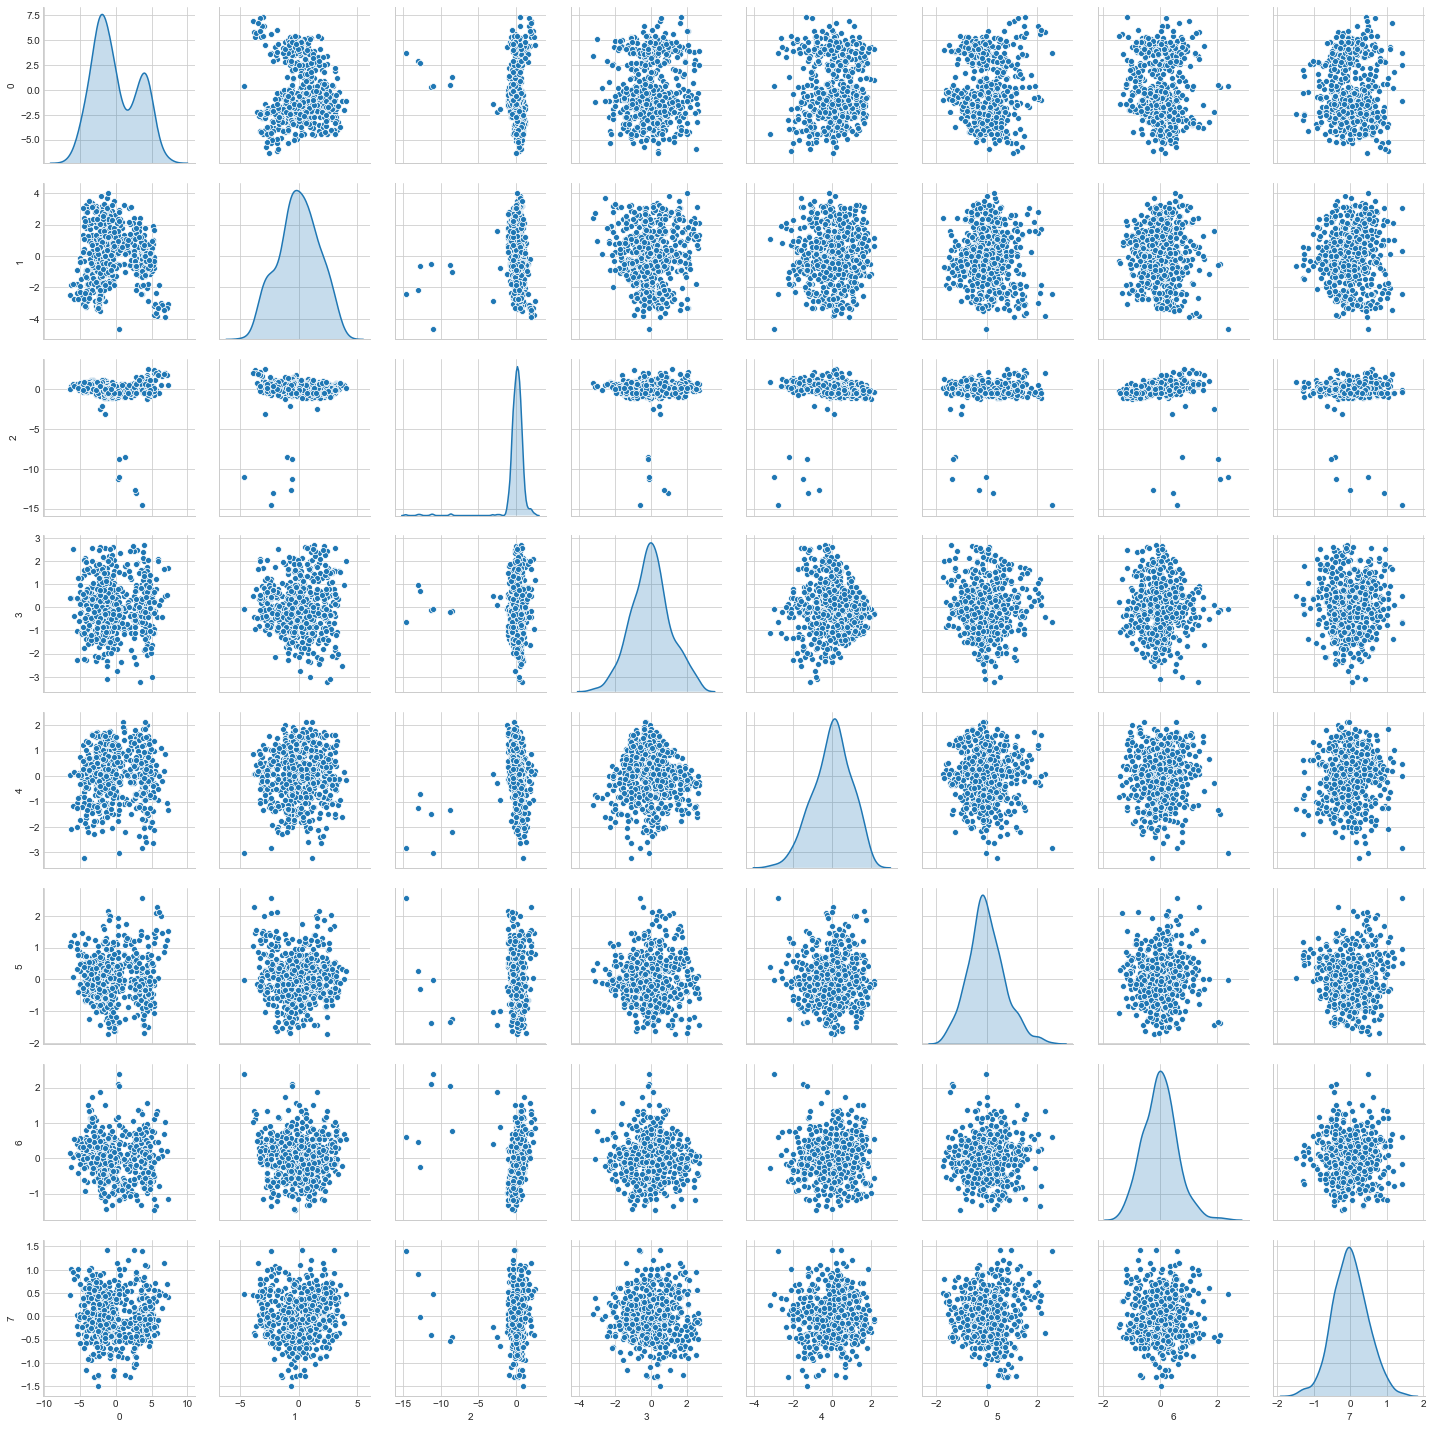

In [52]:
sns.pairplot(Projected_df_train, diag_kind='kde')

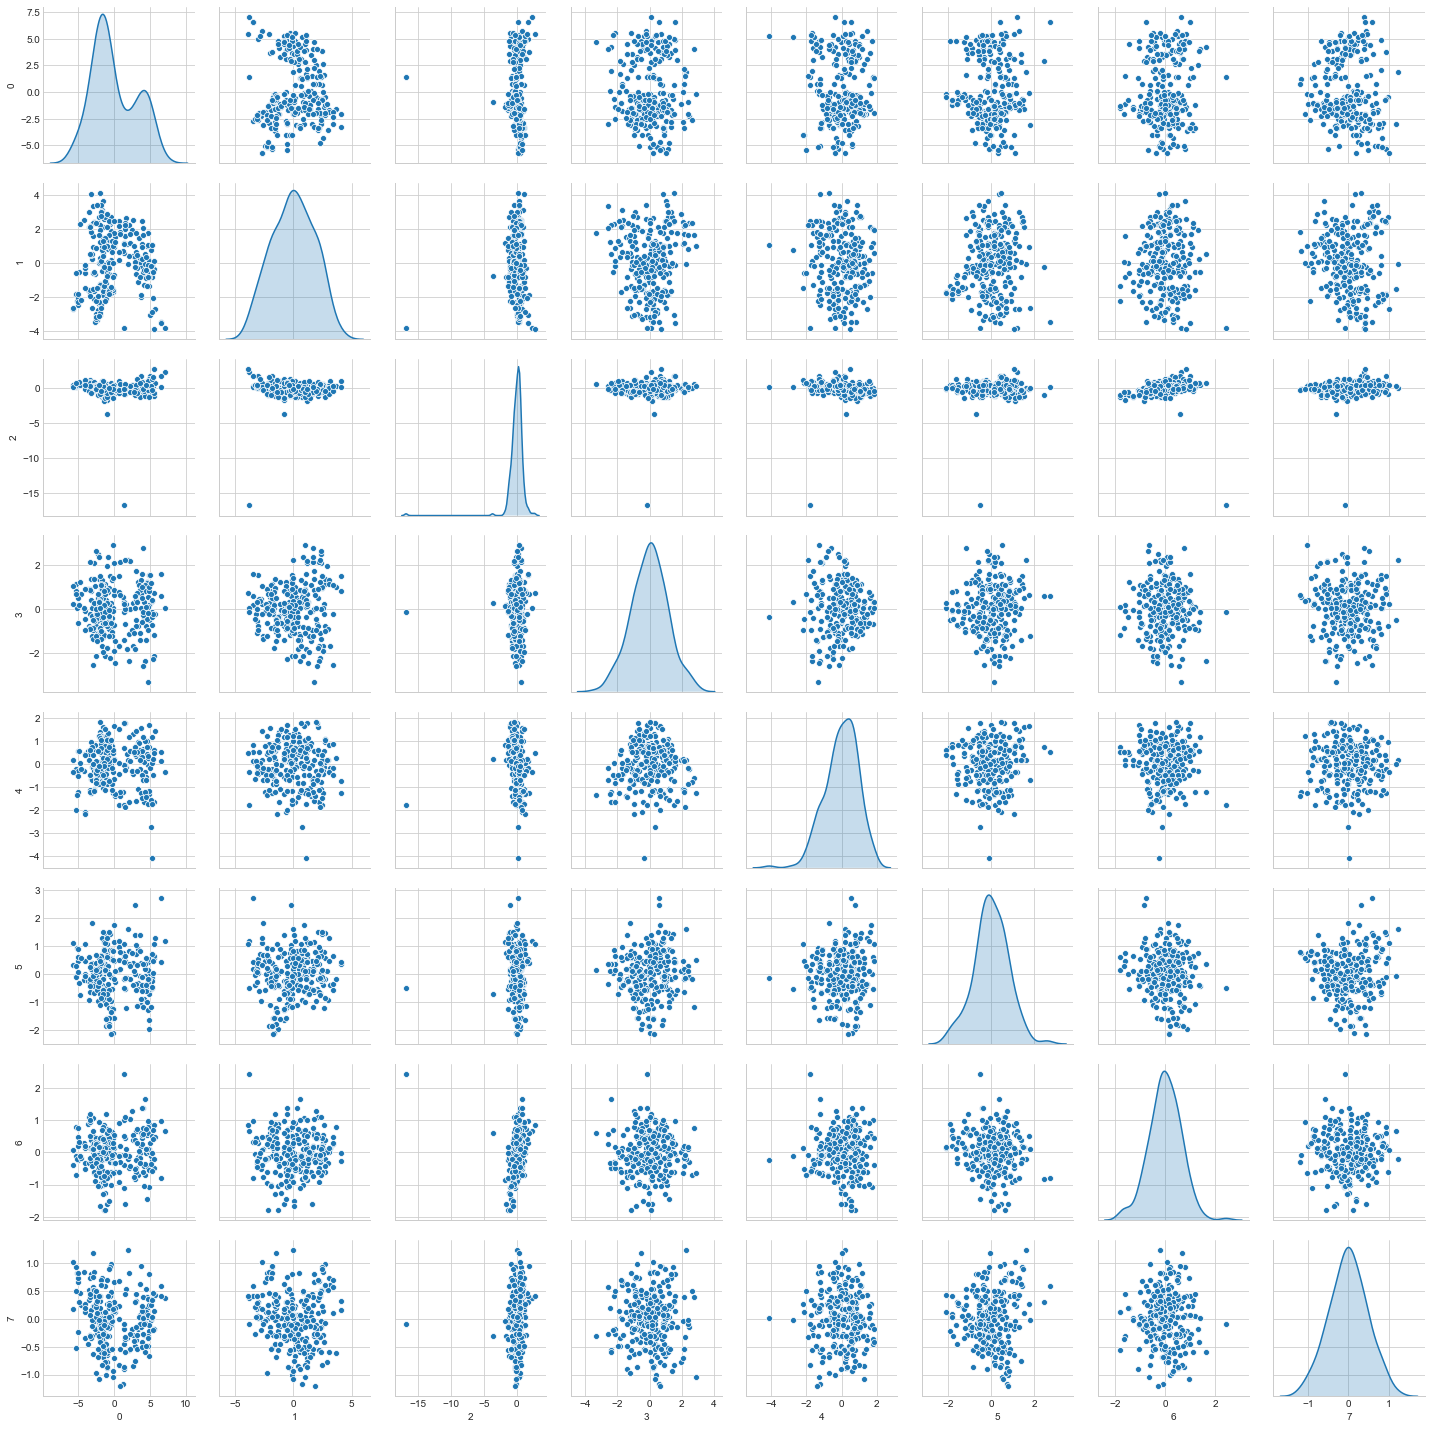

In [53]:
sns.pairplot(Projected_df_test, diag_kind='kde')

In [54]:
ssx_train_sd.shape, P_reduce_1.T.shape, X_train_std_pca.shape, X_test_std_pca.shape

((592, 18), (18, 8), (592, 8), (254, 8))

In [55]:
clf1 = SVC()
clf1.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', clf1.score(ssx_test_sd, SplitScale_y_test))

clf2 = SVC()
clf2.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', clf2.score(X_test_std_pca, SplitScale_y_test))


#print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
#print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

#predict the y value
pca_yhat_predict= clf2.predict(X_test_std_pca)

#orginal data yhat value
orig_yhat_predict = clf1.predict(ssx_test_sd)

print("Before PCA On Original 18 Dimension",accuracy_score(SplitScale_y_test,orig_yhat_predict))
print("After PCA(On 8 dimension)",accuracy_score(SplitScale_y_test,pca_yhat_predict))

Before PCA score 0.9566929133858267
After PCA score 0.952755905511811
Before PCA On Original 18 Dimension 0.9566929133858267
After PCA(On 8 dimension) 0.952755905511811


# After we split the data set into test & train set before applying standardscaler():

On training data set we saw that our support vector classifier without performing PCA has an accuracy score of 95 %

But when we applied the SVC model on PCA componenets(reduced dimensions) our model still performed better with 95 % with only miniscule fall in score.

Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model has fared well in terms of accuracy score.

# Calculate Confusion Matrix & Plot To Visualize it

Confusion Matrix For : 
 Original Data Set [[ 68   1   2]
 [  1 118   6]
 [  0   1  57]]


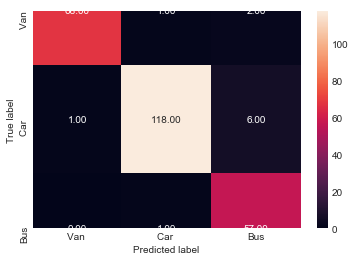

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 68   3   0]
 [  2 118   5]
 [  1   1  56]]


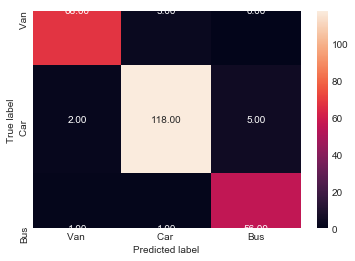

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        71
         1.0       0.98      0.94      0.96       125
         2.0       0.88      0.98      0.93        58

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.96      0.96      0.96       254

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        71
         1.0       0.97      0.94      0.96       125
         2.0       0.92      0.97      0.94        58

    accuracy                           0.95       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.95      0.95      0.95       254



In [56]:
draw_confmatrix(SplitScale_y_test, orig_yhat_predict,"Van ", "Car ", "Bus", "Original Data Set" )

draw_confmatrix(SplitScale_y_test, pca_yhat_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")

#Classification Report Of Model built on Raw Data
print("Classification Report For Raw Data:", "\n", classification_report(SplitScale_y_test,orig_yhat_predict))

#Classification Report Of Model built on Principal Components:

print("Classification Report For PCA:","\n", classification_report(SplitScale_y_test,pca_yhat_predict))

- In our approach 1: we saw that our model actual instances of Van : 59, car : 133 and bus : 62   
- But in our second approach where we split the data set and then scaled , we saw the actual categorization instances as Van : 71, Car : 125, Bus: 58 

# For Reduced Dimensions Using PCA [[ 68 3 0] [ 2 118 5] [ 1 1 56]]

Clearly both the model has almost same level of precitiability when it comes to correctly classifying van , car and bus. Which was not the case with approach 1.

IN approach one our confuson matrix showed that model on original data out of 133 actual car instance, correctly predicted 129 instances to be cars. while in appraich to out of actual 125 cars , it has correctly predicted 118 of instances to be a car

# Apply Grid Search & Cross-Validation:To Tune Our Model and Validate The Model's Accuracy Score

In [57]:
import itertools

def classifiers_hypertune(name,rf,param_grid,x_train_scaled,y_train,x_test_scaled,y_test,CV):
    CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=CV, verbose= 1, n_jobs =-1 )
    CV_rf.fit(x_train_scaled, y_train)
    
    y_pred_train = CV_rf.predict(x_train_scaled)
    y_pred_test = CV_rf.predict(x_test_scaled)
    
    print('Best Score: ', CV_rf.best_score_)
    print('Best Params: ', CV_rf.best_params_)
    
    
    
    #Classification Report
    print(name+" Classification Report: ")
    print(classification_report(y_test, y_pred_test))
    
   
    #Confusion Matrix for test data
    draw_confmatrix(y_test, y_pred_test,"Van", "Car", "Bus", "Original Data Set" )
    print("SVM Accuracy Score:",round(accuracy_score(y_test, y_pred_test),2)*100)
    

In [58]:
#Training on SVM Classifier
from sklearn.model_selection import GridSearchCV
svmc = SVC()

#Let's See What all parameters one can tweak 
print("SVM Parameters:", svmc.get_params())

# Create the parameter grid based on the results of random search 
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1],  'kernel': ['rbf']},
 ]

param_grid_1 = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

SVM Parameters: {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


# SVM using hyper Parameters:

# In Case Of PCA:

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.9s finished
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score:  0.9256756756756757
Best Params:  {'C': 1, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        71
         1.0       0.97      0.94      0.96       125
         2.0       0.92      0.97      0.94        58

    accuracy                           0.95       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.95      0.95      0.95       254

Confusion Matrix For : 
 Original Data Set [[ 68   3   0]
 [  2 118   5]
 [  1   1  56]]


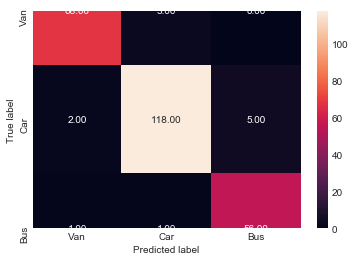

SVM Accuracy Score: 95.0


In [59]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid,X_train_std_pca, SplitScale_y_train, X_test_std_pca, SplitScale_y_test,10)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.6s finished
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score:  0.956081081081081
Best Params:  {'C': 1, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        71
         1.0       0.98      0.94      0.96       125
         2.0       0.88      0.98      0.93        58

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.96      0.96      0.96       254

Confusion Matrix For : 
 Original Data Set [[ 68   1   2]
 [  1 118   6]
 [  0   1  57]]


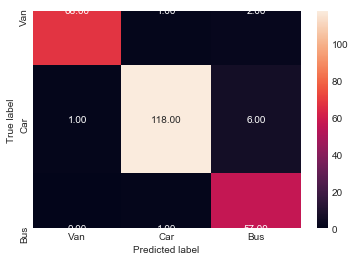

SVM Accuracy Score: 96.0


In [60]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid,ssx_train_sd, SplitScale_y_train, ssx_test_sd, SplitScale_y_test,10)

# For Original Data Set

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.2min finished
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score:  0.9358108108108109
Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Support Vector Classifier_iterarion2 Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94        71
         1.0       0.94      0.94      0.94       125
         2.0       0.90      0.95      0.92        58

    accuracy                           0.94       254
   macro avg       0.93      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254

Confusion Matrix For : 
 Original Data Set [[ 66   4   1]
 [  3 117   5]
 [  0   3  55]]


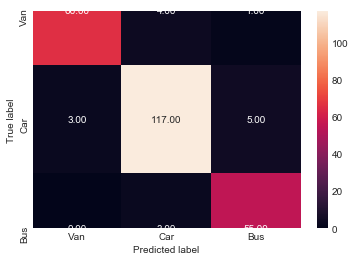

SVM Accuracy Score: 94.0


In [61]:
classifiers_hypertune("Support Vector Classifier_iterarion2", svmc, param_grid_1,X_train_std_pca, SplitScale_y_train, X_test_std_pca, SplitScale_y_test,10)

# Iteration 2 : On original Data Set

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    9.2s finished
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score:  0.9679054054054054
Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       1.00      0.95      0.98       125
         2.0       0.94      1.00      0.97        58

    accuracy                           0.97       254
   macro avg       0.96      0.98      0.97       254
weighted avg       0.97      0.97      0.97       254

Confusion Matrix For : 
 Original Data Set [[ 70   0   1]
 [  3 119   3]
 [  0   0  58]]


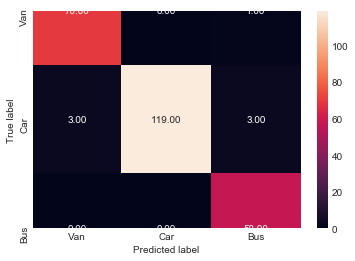

SVM Accuracy Score: 97.0


In [62]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid_1,ssx_train_sd, SplitScale_y_train, ssx_test_sd, SplitScale_y_test,10)

# We can see a slight improvement in best model which was picked by our gridsearchcv method: 96.79 % and also we saw a slight increase in model accuracy score : 97 %